# L2: Image captioning app 🖼️📝

Load your HF API key and relevant Python libraries

In [3]:
# !pip install python-dotenv

In [4]:
import os
import io
import IPython.display
from PIL import Image
import base64
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
hf_api_key = os.environ['HF_API_KEY']

In [20]:
# Helper functions
import requests, json

#Image-to-text endpoint
# the instructions could have been clearer:
# Copy model name used : Which is Salesforce/blip-image-captioning-base.
# Go To : https://huggingface.co/models and search for above model : Salesforce/blip-image-captioning-base
# Open that model
# Click on Deploy. You will see an option Interface API
# Clicking on that will reveal API_URL which is free to use directly in your project.
# source: https://community.deeplearning.ai/t/how-to-find-the-endpoint-url-for-the-models-like-hf-api-itt-base/428007/2
def get_completion(inputs, parameters=None, ENDPOINT_URL= "https://api-inference.huggingface.co/models/Salesforce/blip-image-captioning-base"):
                  #  os.environ['HF_API_ITT_BASE']):
    headers = {
      "Authorization": f"Bearer {hf_api_key}",
      "Content-Type": "application/json"
    }
    data = { "inputs": inputs }
    if parameters is not None:
        data.update({"parameters": parameters})
    response = requests.request("POST",
                                ENDPOINT_URL,
                                headers=headers,
                                data=json.dumps(data))
    return json.loads(response.content.decode("utf-8"))

## Building an image captioning app

Here we'll be using an [Inference Endpoint](https://huggingface.co/inference-endpoints) for `Salesforce/blip-image-captioning-base` a 14M parameter captioning model.

The free images are available on: https://free-images.com/

In [21]:
image_url = "https://free-images.com/sm/9596/dog_animal_greyhound_983023.jpg"
display(IPython.display.Image(url=image_url))
get_completion(image_url)
# 🎉🎉

[{'generated_text': 'a dog wearing a santa hat and a red scarf'}]

## Captioning with `gr.Interface()`

#### gr.Image()
- The `type` parameter is the format that the `fn` function expects to receive as its input.  If `type` is `numpy` or `pil`, `gr.Image()` will convert the uploaded file to this format before sending it to the `fn` function.
- If `type` is `filepath`, `gr.Image()` will temporarily store the image and provide a string path to that image location as input to the `fn` function.

In [13]:
# !pip install gradio

In [27]:
import gradio as gr

def image_to_base64_str(pil_image):
    byte_arr = io.BytesIO()
    pil_image.save(byte_arr, format='PNG')
    byte_arr = byte_arr.getvalue()
    return str(base64.b64encode(byte_arr).decode('utf-8'))

def captioner(image):
    base64_image = image_to_base64_str(image)
    result = get_completion(base64_image)
    return result[0]['generated_text']

gr.close_all()
demo = gr.Interface(fn=captioner,
                    inputs=[gr.Image(label="Upload image", type="pil")],
                    outputs=[gr.Textbox(label="Caption")],
                    title="Image Captioning with BLIP",
                    description="Caption any image using the BLIP model",
                    allow_flagging="never",
                    examples=["christmas_dog.jpeg", "bird_flight.jpeg", "cow.jpeg"])

# demo.launch(share=True, server_port=int(os.environ['PORT1']))
demo.launch(share=True, server_port=int(2024))

Closing server running on port: 2024
Closing server running on port: 2024


/usr/local/lib/python3.10/dist-packages/gradio/interface.py:393: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://93989897d34454d889.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Saving dog_captions.png to dog_captions (1).png


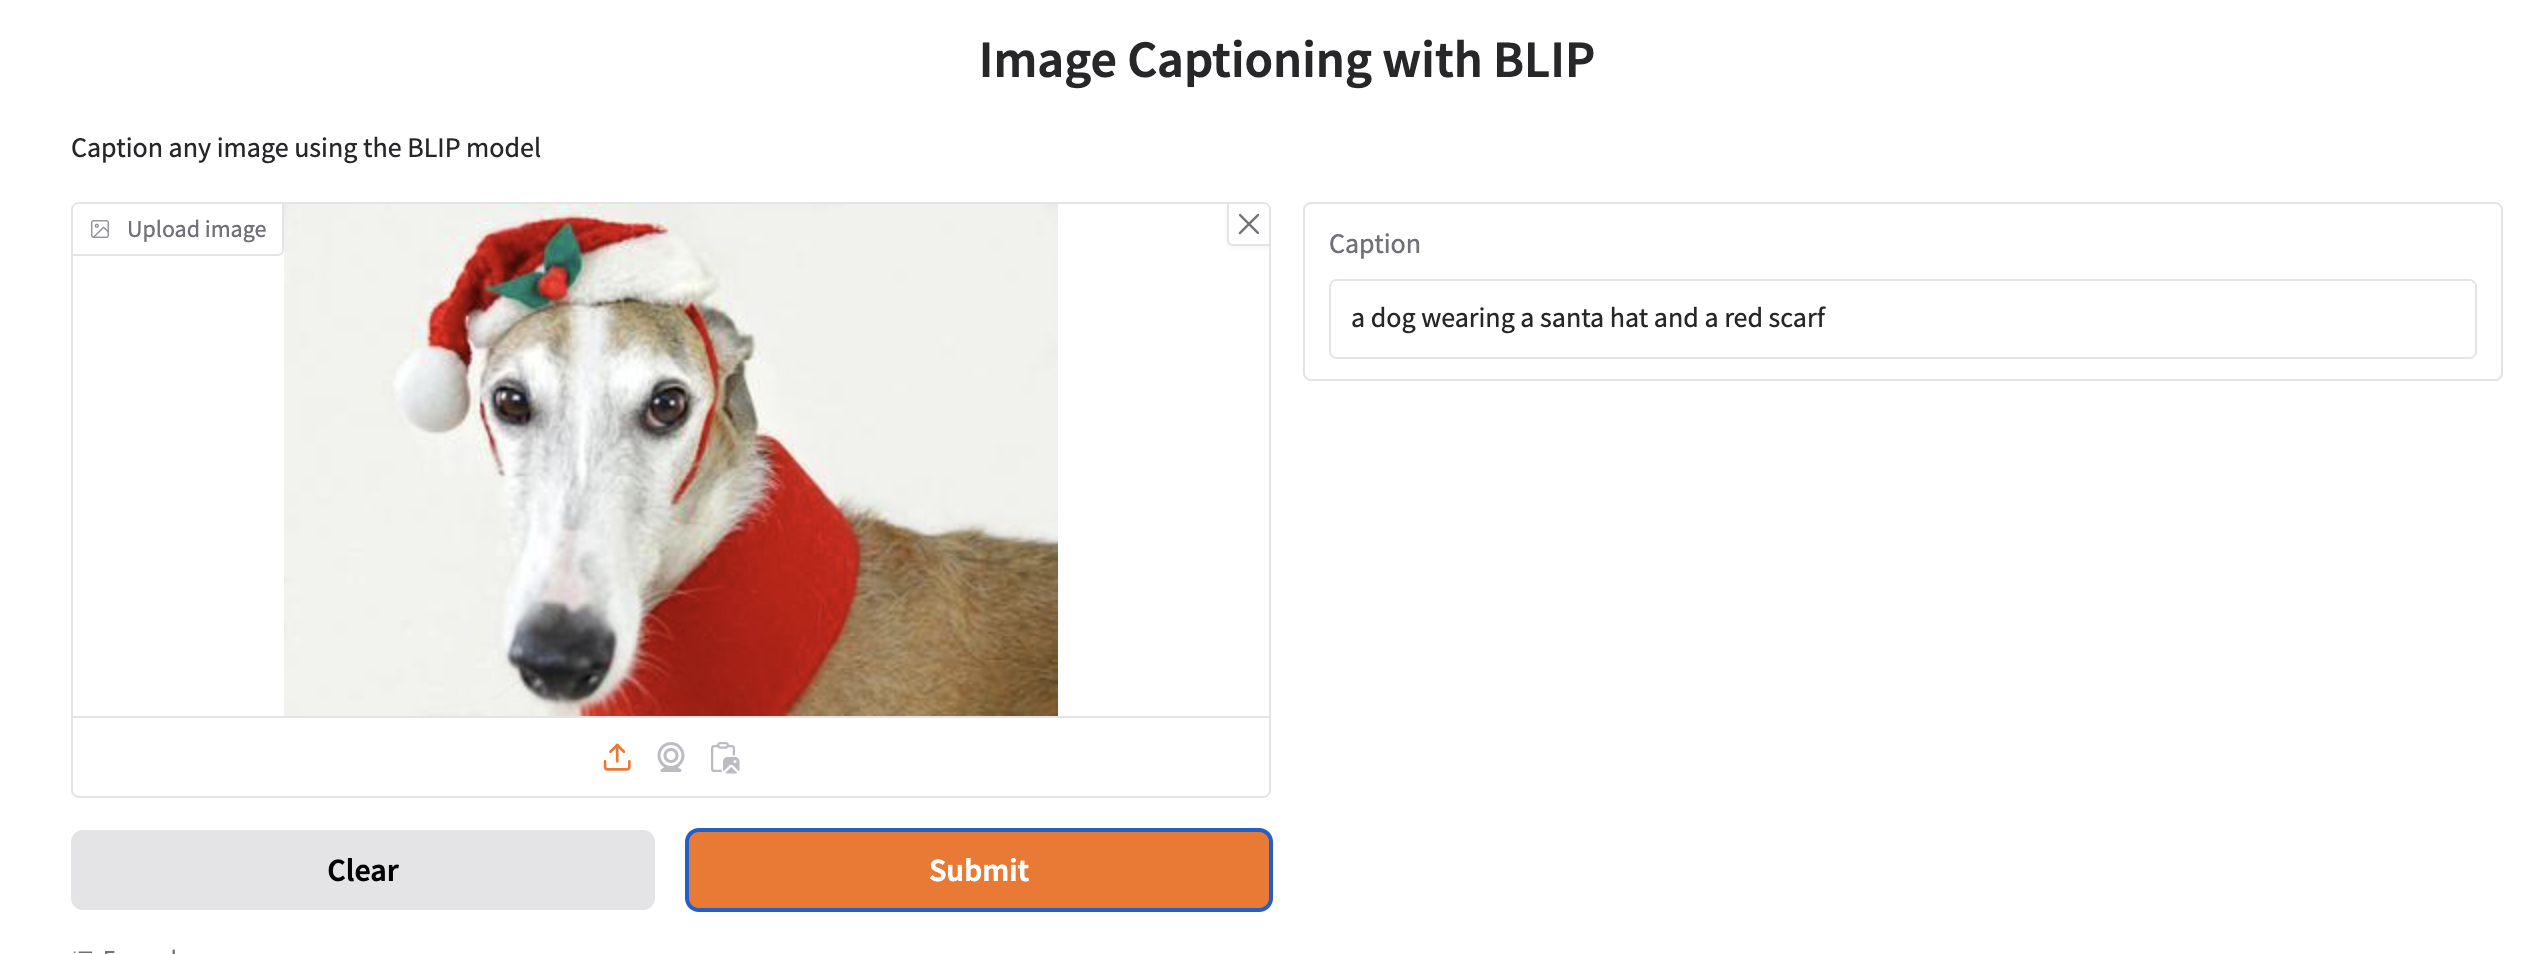

In [24]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()
Image(filename='dog_captions.png')
# 🎉

In [28]:
gr.close_all()

Closing server running on port: 2024
Closing server running on port: 2024
Closing server running on port: 2024
